<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Funções" data-toc-modified-id="Funções-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Funções</a></span></li><li><span><a href="#Lendo-os-Dados" data-toc-modified-id="Lendo-os-Dados-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Lendo os Dados</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Dados-Nulos" data-toc-modified-id="Dados-Nulos-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Dados Nulos</a></span></li><li><span><a href="#Tipos-Primitivos" data-toc-modified-id="Tipos-Primitivos-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Tipos Primitivos</a></span></li><li><span><a href="#Exploração-Gráfica" data-toc-modified-id="Exploração-Gráfica-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Exploração Gráfica</a></span><ul class="toc-item"><li><span><a href="#Estudo-Por-Período" data-toc-modified-id="Estudo-Por-Período-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Estudo Por Período</a></span></li><li><span><a href="#Estudo-Por-Estado" data-toc-modified-id="Estudo-Por-Estado-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Estudo Por Estado</a></span></li><li><span><a href="#Estudo-por-Pagamento" data-toc-modified-id="Estudo-por-Pagamento-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Estudo por Pagamento</a></span></li><li><span><a href="#Estudo-por-Produto" data-toc-modified-id="Estudo-por-Produto-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Estudo por Produto</a></span></li><li><span><a href="#Estudo-por-Review" data-toc-modified-id="Estudo-por-Review-3.3.5"><span class="toc-item-num">3.3.5&nbsp;&nbsp;</span>Estudo por Review</a></span></li></ul></li></ul></li></ul></div>

Neste notebook, iremos trabalhar em cima de múltiplos conjuntos de dados contendo informações a respeito do E-Commerce no Brasil. Os dados públicos levantados pela empres **Olist** agrupam aproximadamentee 100.000 pedidos on-line (e anônimos) dispostos em 8 diferentes datasets. O grande objetivo deste notebook é analisar os dados contidos nestes conjuntos e realizar análises que possam descrever o comportamento deste tipo de relação comercial, respondendo perguntas de acordo com o andamento do projeto. [Kaggle-Brazilian-e-commerce](https://www.kaggle.com/olistbr/brazilian-ecommerce#olist_orders_dataset.csv)

Datasets disponíveis:

    olist_customers_dataset.csv
    olist_geolocation_dataset.csv
    olist_orders_dataset.csv
    olist_order_items_dataset.csv
    olist_order_payments_dataset.csv
    olist_order_reviews_dataset.csv
    olist_products_dataset.csv
    olist_sellers_dataset.csv
    product_category_name_translation.csv

<img src="images/brazilian_e-commerce_schema.png" alt="Dataset Schema" style="width: 550px;"/>

## Funções

In [1]:
def format_spines(ax, right_border=True):
    """docstring for format_spines:
    this function sets up borders from an axis and personalize colors
    input:
        ax: figure axis
        right_border: flag to determine if the right border will be visible or not"""
    
    # Setting up colors
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color('#CCCCCC')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')


def count_plot(feature, df, colors='Blues_d', hue=False, ax=None, title=''):
    """docstring for count_plot:
    this function plots data setting up frequency and percentage. This also sets up borders
    and personalization
    input:
        feature: feature to be plotted
        df: dataframe
        colors = color palette (default=Blues_d)
        hue = second feature analysis (default=False)"""
    
    # Preparing variables
    ncount = len(df)
    #fig, ax = plt.subplots()
    if hue != False:
        ax = sns.countplot(x=feature, data=df, palette=colors, hue=hue, ax=ax)
    else:
        ax = sns.countplot(x=feature, data=df, palette=colors, ax=ax)

    # Make twin axis
    ax2=ax.twinx()

    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Frequency [%]')

    # Setting borders
    format_spines(ax)
    format_spines(ax2)

    # Setting percentage
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
        
    if not hue:
        ax.set_title(df[feature].describe().name + ' Analysis', size=13, pad=15)
    else:
        ax.set_title(df[feature].describe().name + ' Analysis by ' + hue, size=13, pad=15)
    
    if title != '':
        ax.set_title(title)
        
    plt.tight_layout()

def bar_plot(x, y, df, colors='Blues_d', hue=False, ax=None, value=False):
    """docstring for count_plot:
    this function plots data setting up frequency and percentage. This also sets up borders
    and personalization
    input:
        feature: feature to be plotted
        df: dataframe
        colors = color palette (default=Blues_d)
        hue = second feature analysis (default=False)"""
    
    # Preparing variables
    try:
        ncount = sum(df[y])
    except:
        ncount = sum(df[x])
    #fig, ax = plt.subplots()
    if hue != False:
        ax = sns.barplot(x=x, y=y, data=df, palette=colors, hue=hue, ax=ax, ci=None)
    else:
        ax = sns.barplot(x=x, y=y, data=df, palette=colors, ax=ax, ci=None)

    # Make twin axis
    ax2=ax.twinx()

    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Frequency [%]')

    # Setting borders
    format_spines(ax)
    format_spines(ax2)

    # Setting percentage
    for p in ax.patches:
        xp=p.get_bbox().get_points()[:,0]
        yp=p.get_bbox().get_points()[1,1]
        if value:
            ax.annotate('{:.2f}k'.format(yp/1000), (xp.mean(), yp), 
                    ha='center', va='bottom') # set the alignment of the text
        else:
            ax.annotate('{:.1f}%'.format(100.*yp/ncount), (xp.mean(), yp), 
                    ha='center', va='bottom') # set the alignment of the text
    if not hue:
        ax.set_title(df[x].describe().name + ' Analysis', size=13, pad=15)
    else:
        ax.set_title(df[x].describe().name + ' Analysis by ' + hue, size=13, pad=15)
    
    plt.tight_layout()

## Lendo os Dados

In [2]:
# Importando pandas
import pandas as pd

# Lendo os dados
df_customers = pd.read_csv('olist_customers_dataset.csv')
df_geolocation = pd.read_csv('olist_geolocation_dataset.csv')
df_orders = pd.read_csv('olist_orders_dataset.csv')
df_items = pd.read_csv('olist_order_items_dataset.csv')
df_payments = pd.read_csv('olist_order_payments_dataset.csv')
df_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
df_products = pd.read_csv('olist_products_dataset.csv')
df_sellers = pd.read_csv('olist_sellers_dataset.csv')

In [3]:
# Verificando colunas de cada um dos datasets
dataframes = {
    'Customers': df_customers,
    'Geolocation': df_geolocation,
    'Orders': df_orders,
    'Items': df_items,
    'Payments': df_payments,
    'Reviews': df_reviews,
    'Products': df_products,
    'Sellers': df_sellers
}

for df_name, df in dataframes.items():
    print(f'{df_name}')
    print(f'{list(df.columns)}\n')

Customers
['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']

Geolocation
['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']

Orders
['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

Items
['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']

Payments
['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']

Reviews
['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']

Products
['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_wid

## EDA

### Dados Nulos

In [4]:
# Verificando dados nulos
for df_name, df in dataframes.items():
    print(f'{df_name}: {df.isnull().any().any()}\n')

Customers: False

Geolocation: False

Orders: True

Items: False

Payments: False

Reviews: True

Products: True

Sellers: False



In [5]:
# Verificando dados nulos
for df_name, df in dataframes.items():
    if df.isnull().any().any():
        print(f'Dataset: {df_name}\n')
        print(f'{df.isnull().sum()}\n')

Dataset: Orders

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Dataset: Reviews

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Dataset: Products

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64



* Os dados nulos no dataset **Orders** são dados por:

    - Pedidos sem data de aprovação;
    - Pedidos que não foram entregues na transportadora;
    - Pedidos ainda não entregues aos clientes.


* Os dados nulos no dataset **Reviews** são dados por:
    - Pedidos sem comentários;
    - Comentários postados sem título;


* Os dados nulos no dataset **Produtos** são dados por:
    - Produtos sem categoria, sem informações de nome, descrição, fotos e atributos

### Tipos Primitivos

In [6]:
# Verificando tipos primitivos
for df_name, df in dataframes.items():
    print(f'Dataset: {df_name}\n')
    print(f'{df.dtypes}\n')

Dataset: Customers

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

Dataset: Geolocation

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

Dataset: Orders

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

Dataset: Items

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
frei

Existem alguns dados salvos como string que deveriam ser do tipo *datetime*. Vejamos no dataset Orders.

In [7]:
# Cabeçalho Orders
df_orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


As colunas a seguir devem ser transformadas para o tipo *datetime*:

    order_purchase_timestamp
    order_approved_at
    order_delivered_carrier_date
    order_delivered_customer_date
    order_estimated_delivery_date

In [8]:
# Transformando dados timestamp
time_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
           'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in time_cols:
    df_orders[col] = pd.to_datetime(df_orders[col])
    
# Verificando
df_orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

### Exploração Gráfica

Nesta sessão, iremos obter informações sobre os seguintes tópicos:

* Frequência de compra online por Ano, Mês e Dia da Semana;
* Histórico de vendas ao longo do tempo em **2017** e em **2018**;
* Quantidade de vendas por **estado**;
* Valor médio de frete por **estado**;
* Tempo médio de aprovação, postagem e entrega por **estado**;
* Diferença entre tempo estimado e tempo de entrega por **estado**;
* Quantidade de pedidos por **tipo de pagamento**;
* Review Score por **tipo de produto** e **estado**.

In [9]:
# Importando bibliotecas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Estudo Por Período

In [10]:
# Criando nova coluna para ano
df_orders['order_purchase_year'] = \
df_orders['order_purchase_timestamp'].apply(lambda x: x.year)

# Criando nova coluna para mês
df_orders['order_purchase_month'] = \
df_orders['order_purchase_timestamp'].apply(lambda x: x.month)

# Criando nova coluna para dia da semana
df_orders['order_purchase_dayofweek'] = \
df_orders['order_purchase_timestamp'].apply(lambda x: x.dayofweek)

In [11]:
print(f'Data da primeira observação do dataset: \
{df_orders["order_purchase_timestamp"].min()}')
print(f'Data da última observação do dataset: \
{df_orders["order_purchase_timestamp"].max()}')

Data da primeira observação do dataset: 2016-09-04 21:15:19
Data da última observação do dataset: 2018-10-17 17:30:18


Temos dados desde Setembro/16 até Outubro/18

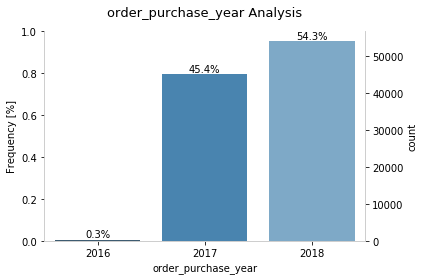

In [12]:
# Quantidade de vendas online por ano (neste dataset)
count_plot(feature='order_purchase_year', df=df_orders)
plt.show()

Por conta da pouca presença de dados em 2016, vamos preparar os dados para as plotagens seguintes.

In [13]:
# Unindo datasets de pedidos e itens
df_orders_items = df_orders.merge(df_items, on='order_id', how='inner')

# Criando uma coluna para somar o valor do item + frete
df_orders_items['total_sales'] = df_orders_items['price'] + df_orders_items['freight_value']

# Agrupando datasets por vendas mensais e anuais
df_sales = \
df_orders_items.groupby(['order_purchase_year', 'order_purchase_month'], 
                         as_index=False).sum()\
.loc[:, ['order_purchase_year', 'order_purchase_month', 'total_sales']]

df_sales_2016 = df_sales[df_sales['order_purchase_year']==2016]
df_sales_2017 = df_sales[df_sales['order_purchase_year']==2017]
df_sales_2018 = df_sales[df_sales['order_purchase_year']==2018]

In [14]:
# Preenchendo meses não presentes nos datasets
months = np.arange(1, 13)
df_append = pd.DataFrame({})
grouped_dfs = df_sales_2016, df_sales_2017, df_sales_2018
years = [2016, 2017, 2018]
idx = 0

# Laço para preenchimento dos dados
for df in grouped_dfs:
    for month in months:
        # Se existe um mês não presente no dataset
        if month not in df['order_purchase_month'].values:
            dict_append = {
                'order_purchase_year': years[idx],
                'order_purchase_month': month,
                'total_sales': 0
            }
            df_append = df_append.append(dict_append, ignore_index=True)
    # Insere o dicionário no dataset e ordena
    df = df.append(df_append).astype(int)
    df.sort_values(by='order_purchase_month', inplace=True)
    df_append = pd.DataFrame({})
    # Atribui os resultados aos respectivos conjuntos
    if idx == 0:
        df_sales_2016 = df
    elif idx == 1:
        df_sales_2017 = df
    else:
        df_sales_2018 = df
    idx += 1

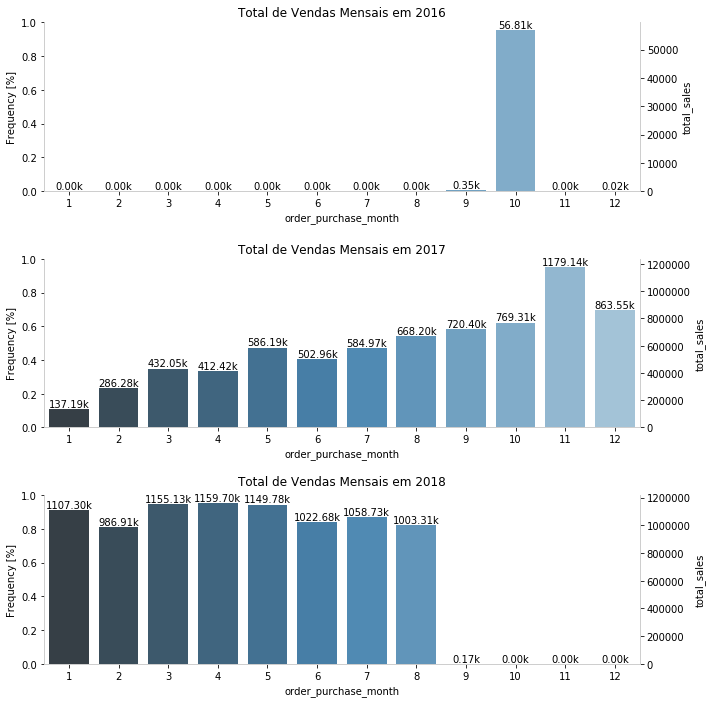

In [15]:
# Quantidade de vendas online por mês (neste dataset)
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
bar_plot(x='order_purchase_month', y='total_sales', df=df_sales_2016, ax=axs[0], value=True)
bar_plot(x='order_purchase_month', y='total_sales', df=df_sales_2017, ax=axs[1], value=True)
bar_plot(x='order_purchase_month', y='total_sales', df=df_sales_2018, ax=axs[2], value=True)
axs[0].set_title('Total de Vendas Mensais em 2016')
axs[1].set_title('Total de Vendas Mensais em 2017')
axs[2].set_title('Total de Vendas Mensais em 2018', pad=10)
plt.show()

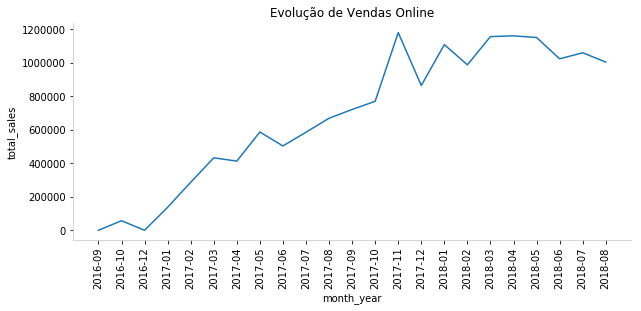

In [16]:
# Transformando coluna mês para correta ordenação na plotagem
df_sales['order_purchase_month'] = df_sales['order_purchase_month'].astype(str).\
apply(lambda x: '0' + x if len(x) == 1 else x)

# Criando nova coluna com ano-mês
df_sales['month_year'] = df_sales['order_purchase_year'].astype(str) + '-' + \
df_sales['order_purchase_month'].astype(str)

# Retornando o tipo primitivo da coluna mês
df_sales['order_purchase_month'] = df_sales['order_purchase_month'].astype(int)

# Plotando dados
fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.lineplot(x='month_year', y='total_sales', data=df_sales.iloc[:-1, :])
format_spines(ax, right_border=False)
ax.tick_params(axis='x', labelrotation=90)
ax.set_title('Evolução de Vendas Online')
plt.show()

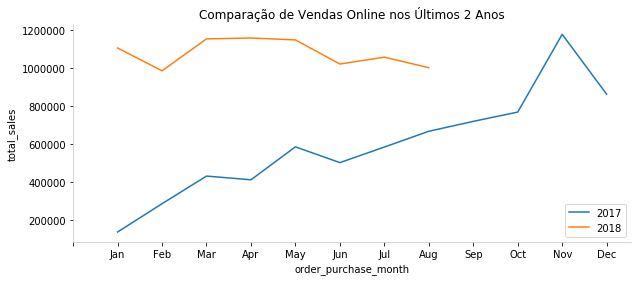

In [17]:
# Cruzando dados de 2017 e 2018
fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.lineplot(x='order_purchase_month', y='total_sales', data=df_sales_2017, label='2017')
ax = sns.lineplot(x='order_purchase_month', y='total_sales', 
                  data=df_sales_2018.iloc[:-4, :], label='2018')
format_spines(ax, right_border=False)
ax.set_title('Comparação de Vendas Online nos Últimos 2 Anos')
plt.xticks(np.arange(13), ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 
                           'Oct', 'Nov', 'Dec'])
plt.show()

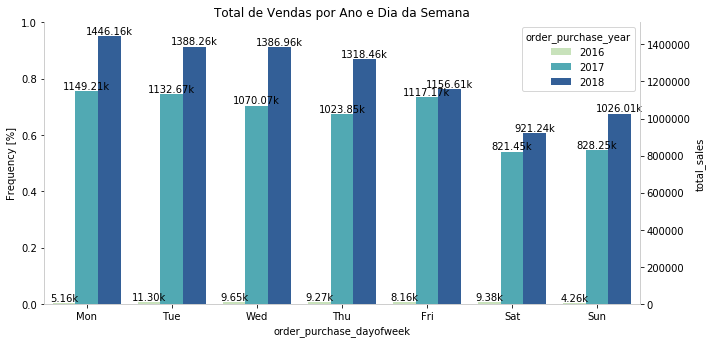

In [18]:
# Agrupando datasets por vendas mensais e anuais
df_sales_dow = \
df_orders_items.groupby(['order_purchase_year', 'order_purchase_dayofweek'], 
                        as_index=False).sum()\
.iloc[:, np.c_[0, 1, 6][0]]

# Plotando gráfico
fig, ax = plt.subplots(figsize=(10, 5))
bar_plot(x='order_purchase_dayofweek', y='total_sales', hue='order_purchase_year', 
         df=df_sales_dow, colors='YlGnBu', value=True)
ax.set_title('Total de Vendas por Ano e Dia da Semana')
plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

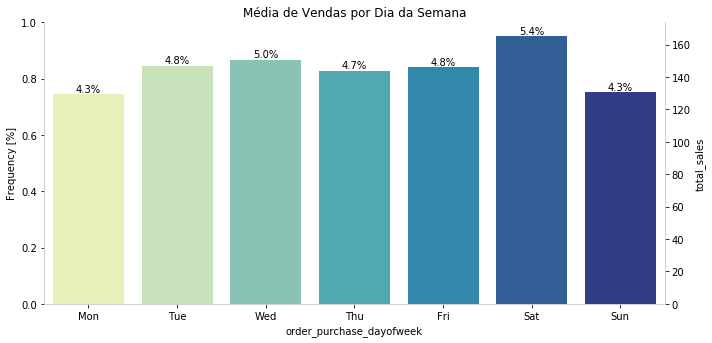

In [19]:
# Média de vendas por dia da semana
df_sales_dow_mean = \
df_orders_items.groupby(['order_purchase_year', 'order_purchase_dayofweek'], 
                        as_index=False).mean()\
.iloc[:, np.c_[0, 1, 6][0]]

# Plotando gráfico
fig, ax = plt.subplots(figsize=(10, 5))
bar_plot(x='order_purchase_dayofweek', y='total_sales', 
         df=df_sales_dow_mean, colors='YlGnBu')
ax.set_title('Média de Vendas por Dia da Semana')
plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

#### Estudo Por Estado

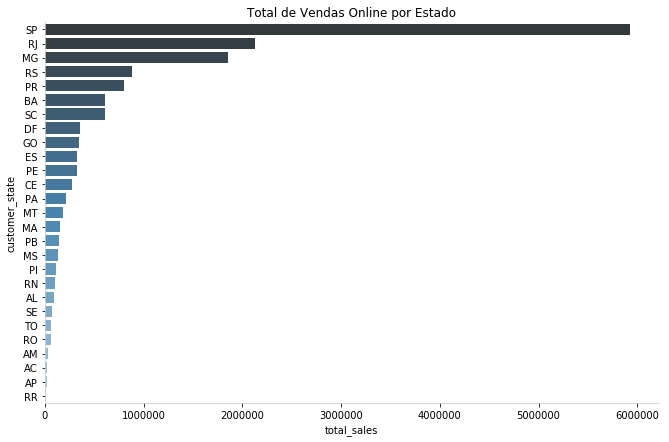

In [20]:
# Unindo dataset de clientes
df_sales_customer = df_orders_items.merge(df_customers, on='customer_id', how='inner')

# Agrupando total de vendas por estado
df_sales_state = df_sales_customer.groupby(['customer_state'], 
                                          as_index=False).sum().iloc[:, np.c_[(0, -2, -3)][0]]
df_sales_state.sort_values(by='total_sales', ascending=False, inplace=True)

fig, ax = plt.subplots(figsize=(11, 7))
sns.barplot(x='total_sales', y='customer_state', data=df_sales_state, ci=None,
                 palette='Blues_d')
format_spines(ax, right_border=False)
ax.set_title('Total de Vendas Online por Estado')

plt.show()

Vamos realizar alguns cálculos para auxiliar nas plotagens a seguir

In [21]:
def add_series_working_days(series_name, df, date_col1, date_col2):
    """
    Função extremamente importante: calcula os dias úteis entre duas datas e retorna este valor
    como uma coluna adicional em um dataframe
    
    Input:
        series_names: nome da nova série criada para alocar a diferença em dias úteis
        df: conjunto de dados onde as colunas de data se encontram
        date_col1: coluna de datas 1
        date_col2: coluna de datas 2
        
    Returns:
        df_return: dataframe com coluna de dias úteis já inserida
    """
    # Calculando lista com diferença entre datas
    time_list = []
    idx = 0
    second_date_series = df[date_col2].values.astype('datetime64[D]')
    for date in df[date_col1].values.astype('datetime64[D]'):
        second_date = second_date_series[idx]
        try:
            workdays = np.busday_count(date, second_date)
        except:
            workdays = np.NaN
        time_list.append(workdays)
        idx += 1
    
    # Adicionando ao dataframe e eliminando valores nulos
    df_return = df.copy()
    df_return[series_name] = pd.Series(time_list)
    df_return.dropna(inplace=True)
    
    return df_return

In [22]:
# Calculando dias úteis de entrega
df_delivery_time = add_series_working_days(series_name='time_to_delivery', 
                                           df=df_sales_customer,
                                           date_col1 = 'order_purchase_timestamp', 
                                           date_col2 = 'order_delivered_customer_date')

# Agrupando tempo médio de entrega por estado
df_delivery_time = df_delivery_time.groupby(['customer_state'], as_index=False).mean()
df_delivery_time = df_delivery_time.iloc[:, np.c_[(0, -1)][0]]

In [23]:
# Calculando dias úteis entre a data de entrega e a data estimada
df_diff_est_deliv = add_series_working_days(series_name='diff_est_deliv', 
                                           df=df_sales_customer,
                                           date_col1 = 'order_delivered_customer_date', 
                                           date_col2 = 'order_estimated_delivery_date')

# Agrupando tempo médio de entrega por estado
df_diff_est_deliv = df_diff_est_deliv.groupby(['customer_state'], as_index=False).mean()
df_diff_est_deliv = df_diff_est_deliv.iloc[:, np.c_[(0, -1)][0]]
df_diff_est_deliv['diff_est_deliv'] = df_diff_est_deliv['diff_est_deliv'].astype(int)

In [24]:
# Calculando parâmetros informativos
df_mean_freight = df_sales_customer.groupby(['customer_state'], 
                                as_index=False).mean().iloc[:, np.c_[(0, -2, -3)][0]]
mean_freight_value = df_mean_freight['freight_value'].mean()
mean_delivery_time = df_delivery_time['time_to_delivery'].mean()
mean_diff_estimative = df_diff_est_deliv['diff_est_deliv'].mean()

In [25]:
# Definindo funções para enxutar a plotagem
def communicate_params(frete, entrega, estimativa):
    # Comunicando frete médio
    axs[0, 0].text(0.5, 0.12, str(f'Frete Médio \nR${frete:.2f}'),
                   fontsize=13, ha='center')
    axs[0, 0].axis('off')
    
    # Comunicando tempo médio de entrega
    axs[0, 1].text(0.5, 0.12, 
                   str(f'Tempo Médio de Entrega \n{int(entrega)} dias úteis.'),
                   fontsize=13, ha='center')
    axs[0, 1].axis('off')
    
    # Comunicando diferença entre tempo de entrega e tempo estimado
    if mean_diff_estimative > 0:
        inf = 'antes'
    else:
        inf = 'depois'
    text_diff_estimative = f'Em média, entregas \nacontecem {int(estimativa)} dias úteis \
\n{inf} do período estimado.'
    axs[0, 2].text(0.5, 0.10, 
                   str(text_diff_estimative), fontsize=13, ha='center')
    axs[0, 2].axis('off')

In [26]:
# Definindo função para enxugar plotagem
def plot_param(df, col, title, xlim, n_row, n_col, y='customer_state', div_xlim=0, 
               one_axis=False, xlabel=[], ylabel='Estado'):
    """
    Função utilizada para plotar um estudo comparativo de acordo com o tema, 
    separando análises de dos 5 Melhores e 5 Piores em assuntos pré-determinados
    
    Input:
        df: dataframe com as informações
        col: coluna com a informação a ser analisada
        title: título da análise
        xlim: limite no eixo X dos números
        n_row: índice da linha onde a plotagem será realizada
        n_col: índice da coluna onde a plotagem será realizada
    """
    # Configurando eixos
    if one_axis:
        ax_top = axs[n_col]
        ax_last = axs[n_col+1]
    else:
        ax_top = axs[n_row, n_col]
        ax_last = axs[n_row+1, n_col]
    
    # Primeiro passo: plotando Top 5
    df.sort_values(by=col, ascending=False, inplace=True)
    top5 = df.iloc[:5, :]
    sns.barplot(x=col, y=y, data=top5, ci=None, palette='Blues_d', ax=ax_top)
    format_spines(ax_top, right_border=False)
    ax_top.set_title(title)
    ax_top.set_xlim(0, xlim)
    ax_top.set_xlabel(xlabel)
    if n_col > 0:
        ax_top.set_ylabel('')
    else:
        ax_top.set_ylabel(ylabel)
    
    # Segundo passo: plotando Top 5 inverso
    last5 = df.iloc[-5:, :]
    sns.barplot(x=col, y=y, data=last5, ci=None, palette='Blues_d', ax=ax_last)
    format_spines(ax_last, right_border=False)
    ax_last.set_title(title.replace('Maior', 'Menor'))
    if div_xlim > 0:
        ax_last.set_xlim(0, xlim/div_xlim)
    else:
        ax_last.set_xlim(0, xlim)
    ax_last.set_xlabel(xlabel)
    if n_col > 0:
        ax_last.set_ylabel('')
    else:
        ax_last.set_ylabel(ylabel)

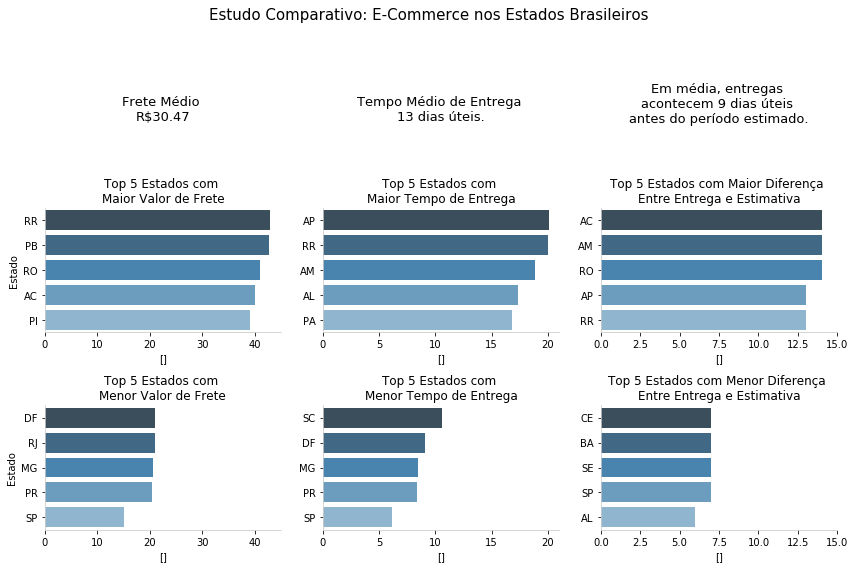

In [27]:
# Plotando
fig, axs = plt.subplots(3, 3, figsize=(12, 8))
communicate_params(mean_freight_value, mean_delivery_time, mean_diff_estimative)

# Plotando informações de frete
plot_param(df=df_mean_freight, col='freight_value', 
           title='Top 5 Estados com \nMaior Valor de Frete', xlim=45, n_row=1, n_col=0)

# Plotando informações sobre tempo de entrega
plot_param(df=df_delivery_time, col='time_to_delivery', 
           title='Top 5 Estados com \nMaior Tempo de Entrega', xlim=21, n_row=1, n_col=1)

# Plotando informações sobre diferença entre data de entrega e data estimada
plot_param(df=df_diff_est_deliv, col='diff_est_deliv', 
           title='Top 5 Estados com Maior Diferença \nEntre Entrega e Estimativa', 
           xlim=15, n_row=1, n_col=2)

plt.suptitle('Estudo Comparativo: E-Commerce nos Estados Brasileiros', size=15)
plt.tight_layout()
plt.show()

#### Estudo por Pagamento

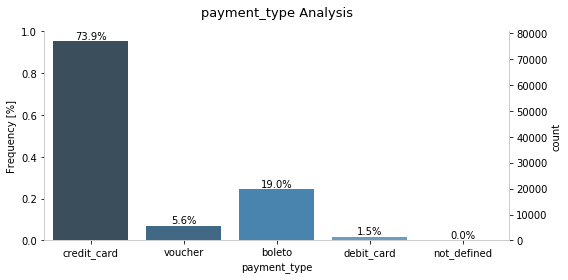

In [28]:
# Unindo dataset de pedidos com dataset de pagamentos
df_sales_payments = df_orders.merge(df_payments, on='order_id', how='inner')

# Verificando quantidade de pedidos por tipo de pagamento
fig, ax = plt.subplots(figsize=(8, 4))
count_plot(feature='payment_type', df=df_sales_payments)

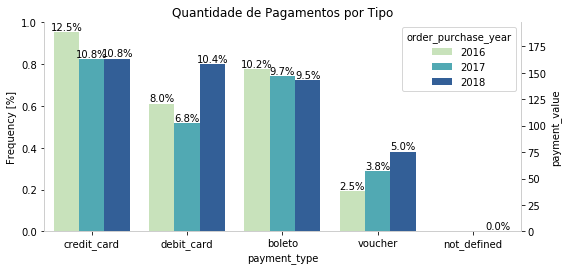

In [29]:
# Agrupando dados
df_payment_type_year = df_sales_payments.groupby(['order_purchase_year', 
                                                  'payment_type'], as_index=False).mean()
df_payment_type_year = df_payment_type_year.iloc[:, np.c_[(0, 1, -1)][0]]
df_payment_type_year = df_payment_type_year.sort_values(by='payment_value', ascending=False)

# Verificando valores pagos por tipo de pagamento
fig, ax = plt.subplots(figsize=(8, 4))
bar_plot(x='payment_type', y='payment_value', df=df_payment_type_year, 
         hue='order_purchase_year', colors='YlGnBu', value=False)
ax.set_title('Quantidade de Pagamentos por Tipo')
plt.show()

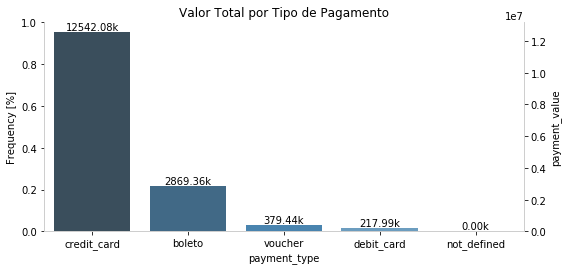

In [30]:
# Agrupando dados
df_payment_type = df_sales_payments.groupby(['payment_type'], as_index=False).sum()
df_payment_type = df_payment_type.iloc[:, np.c_[(0, -1)][0]]
df_payment_type = df_payment_type.sort_values(by='payment_value', ascending=False)

# Verificando valores pagos por tipo de pagamento
fig, ax = plt.subplots(figsize=(8, 4))
bar_plot(x='payment_type', y='payment_value', df=df_payment_type, value=True)
ax.set_title('Valor Total por Tipo de Pagamento')
plt.show()

#### Estudo por Produto

In [31]:
# Unindo datasets e preparando demais datasets para plotagem
df_order_products = df_orders_items.merge(df_products, on='product_id', how='inner')

# Quantidade de vendas
df_qtd_product = df_order_products.groupby(['product_category_name'], 
                                             as_index=False).count()
df_qtd_product = df_qtd_product.loc[:, ['product_category_name', 'total_sales']]

# Receita total
df_sales_product = df_order_products.groupby(['product_category_name'], 
                                             as_index=False).sum()
df_sales_product = df_sales_product.loc[:, ['product_category_name', 'total_sales']]

# Valor médio por categoria
df_mean_product = df_order_products.groupby(['product_category_name'], 
                                             as_index=False).mean()
df_mean_product = df_mean_product.loc[:, ['product_category_name', 'total_sales']]

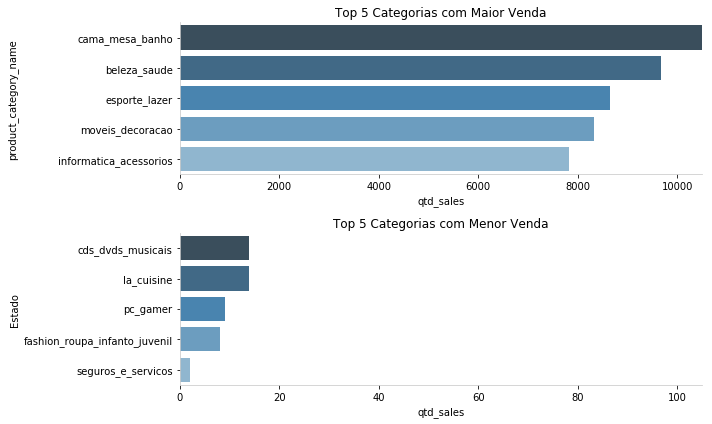

In [32]:
# Quantidade de Vendas
fig, axs = plt.subplots(2, 1, figsize=(10, 6))
plot_param(df=df_qtd_product, col='total_sales', title='Top 5 Categorias com Maior Venda',
           xlim=10500, n_row=0, n_col=0, y='product_category_name', div_xlim=100,
           one_axis=True)
axs[1].set_xlabel('qtd_sales')
axs[0].set_xlabel('qtd_sales')
axs[0].set_ylabel('product_category_name', labelpad=40)
plt.tight_layout()
plt.show()

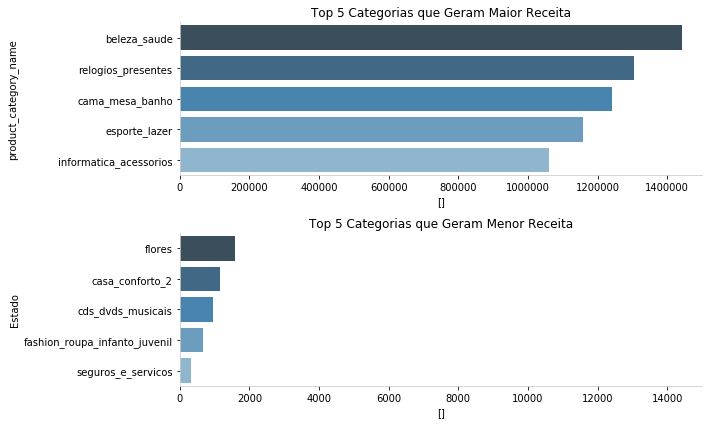

In [33]:
# Valor total de Vendas
fig, axs = plt.subplots(2, 1, figsize=(10, 6))
plot_param(df=df_sales_product, col='total_sales', 
           title='Top 5 Categorias que Geram Maior Receita',
           xlim=1500000, n_row=0, n_col=0, y='product_category_name', div_xlim=100,
           one_axis=True)
axs[0].set_ylabel('product_category_name', labelpad=40)
plt.tight_layout()
plt.show()

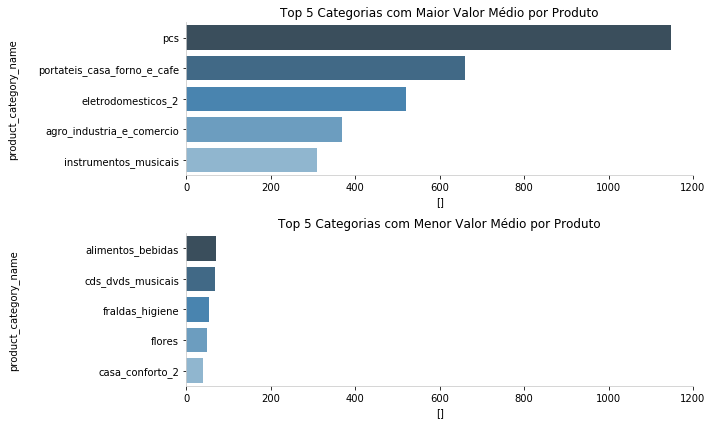

In [34]:
# Valor médio de produto por categoria
fig, axs = plt.subplots(2, 1, figsize=(10, 6))
plot_param(df=df_mean_product, col='total_sales', 
           title='Top 5 Categorias com Maior Valor Médio por Produto',
           xlim=1200, n_row=0, n_col=0, y='product_category_name',
           one_axis=True)
axs[0].set_ylabel('product_category_name', labelpad=20)
axs[1].set_ylabel('product_category_name', labelpad=65)
plt.tight_layout()
plt.show()

#### Estudo por Review

In [35]:
# Unindo datasets
df_ord_prod_cust = df_order_products.merge(df_customers, on='customer_id', how='inner')
df_info_reviews = df_ord_prod_cust.merge(df_reviews, on='order_id', how='inner')
idx_columns = ['order_id', 'order_purchase_year', 'total_sales',
               'product_category_name', 'customer_city', 'customer_state',
               'review_score']
df_info_reviews = df_info_reviews.loc[:, idx_columns]
df_info_reviews.head()

,order_id,order_purchase_year,total_sales,product_category_name,customer_city,customer_state,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,2017,38.71,utilidades_domesticas,sao paulo,SP,4
1,128e10d95713541c87cd1a2e48201934,2017,37.77,utilidades_domesticas,sao paulo,SP,4
2,0e7e841ddf8f8f2de2bad69267ecfbcf,2017,37.77,utilidades_domesticas,sao paulo,SP,5
3,bfc39df4f36c3693ff3b63fcbea9e90a,2017,44.09,utilidades_domesticas,florianopolis,SC,3
4,53cdb2fc8bc7dce0b6741e2150273451,2018,141.46,perfumaria,barreiras,BA,4


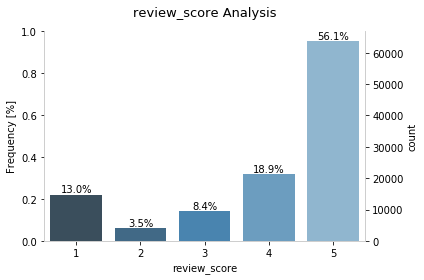

In [36]:
# Verificando quantidade de notas
count_plot(feature='review_score', df=df_info_reviews)
plt.show()

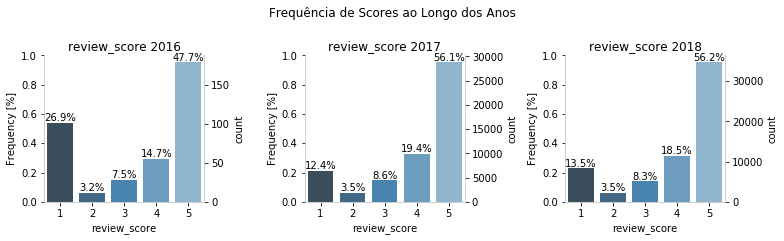

In [37]:
# Comparando score ao longo dos últimos anos
df_review_2016 = df_info_reviews.query('order_purchase_year=="2016"')
df_review_2017 = df_info_reviews.query('order_purchase_year=="2017"')
df_review_2018 = df_info_reviews.query('order_purchase_year=="2018"')

# Plotando contagem de scores ao longo dos anos
fig, axs = plt.subplots(1, 3, figsize=(11, 3))
count_plot(feature='review_score', df=df_review_2016, ax=axs[0], 
           title='review_score 2016')
count_plot(feature='review_score', df=df_review_2017, ax=axs[1], 
           title='review_score 2017')
count_plot(feature='review_score', df=df_review_2018, ax=axs[2], 
           title='review_score 2018')
plt.suptitle('Frequência de Scores ao Longo dos Anos', y=1.1)
plt.show()

In [38]:
# Avaliação média
mean_review_score = df_info_reviews['review_score'].mean()
print(f'Avaliação média dos clientes: {mean_review_score:.2f}')

Avaliação média dos clientes: 4.02


In [39]:
# Agrupando dados por estado
df_state_review = df_info_reviews.groupby(['customer_state'], as_index=False).mean()
df_state_review.sort_values('review_score', ascending=False, inplace=True)
df_state_review = df_state_review.iloc[:, np.c_[(0, -1)][0]]

# Agrupando dados por produto
df_product_review = df_info_reviews.groupby(['product_category_name'], as_index=False).mean()
df_product_review.sort_values('review_score', ascending=False, inplace=True)
df_product_review = df_product_review.iloc[:, np.c_[(0, -1)][0]]

# Agrupando dados por venda média total por score
df_sales_review = df_info_reviews.groupby(['review_score'], as_index=False).mean()
df_sales_review = df_sales_review.iloc[:, np.c_[(0, -1)][0]]

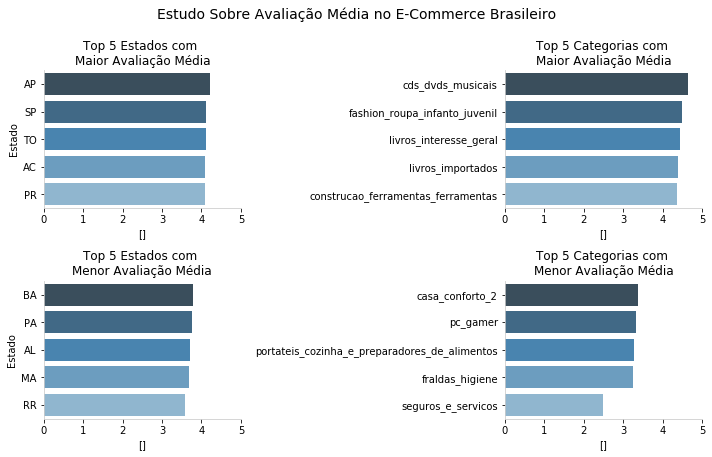

In [40]:
# Plotando dados
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
plot_param(df=df_state_review, col='review_score', y='customer_state',
           title='Top 5 Estados com \nMaior Avaliação Média', xlim=5, n_row=0, n_col=0)
plot_param(df=df_product_review, col='review_score', y='product_category_name',
           title='Top 5 Categorias com \nMaior Avaliação Média', xlim=5, n_row=0, n_col=1)
axs[0, 1].set_ylabel('')
axs[1, 1].set_ylabel('')

plt.suptitle('Estudo Sobre Avaliação Média no E-Commerce Brasileiro', y=1.05, size=14)
plt.tight_layout()
plt.show()